# Color Extraction and Image Segmentation

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

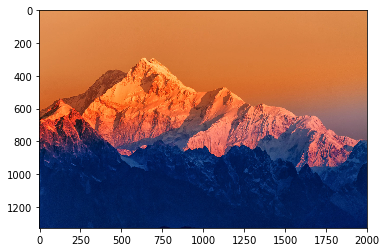

(2656000, 3)


In [11]:
im = cv2.imread("Third-Highest-Mountain-In-The-World.jpg")
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(im)
plt.show()
reshaped_im = im.reshape((-1, 3))
print(reshaped_im.shape)

In [12]:
k = 2
kmeans = KMeans(k)

In [13]:
kmeans.fit(reshaped_im)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [14]:
dominant_colors = kmeans.cluster_centers_.astype('uint8')
dominant_colors

array([[211, 117,  68],
       [ 11,  35,  91]], dtype=uint8)

In [15]:
np.zeros_like(reshaped_im).shape

(2656000, 3)

In [16]:
kmeans.labels_

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

(1328, 2000, 3)


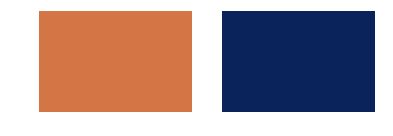

In [17]:
plt.figure()
for i,color in enumerate(dominant_colors):
    palette = np.zeros_like(im, dtype='uint8')
    palette[:,:,:] = color
    plt.subplot(1,k,i+1)
    plt.axis("off")
    plt.imshow(palette)
print(im.shape)    

In [18]:
new_img = np.zeros((im.shape[0]*im.shape[1],3),dtype='uint8')
print(new_img.shape)

(2656000, 3)


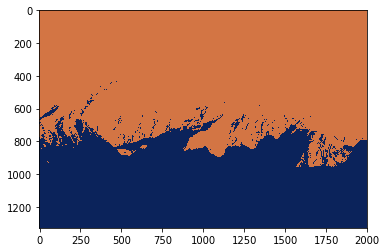

In [19]:
for ix in range(new_img.shape[0]):
    new_img[ix] = dominant_colors[kmeans.labels_[ix]]
    
new_img = new_img.reshape((im.shape))
plt.imshow(new_img)
plt.show()